# Exercises 03

### New business questions

In [1]:
import folium
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = pd.read_csv("../AB_NYC_2019.csv")

In [2]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


1. What is the average price per region?

-> select 'price' and 'neighborhood_group' columns

-> extract the average grouping by 'neighborhood_group'

In [3]:
columns = ["price", "neighbourhood_group"]

mean_price_byregion = (
    data.loc[:, columns].groupby("neighbourhood_group").mean().reset_index()
)

print(f"The average rental values by region are: \n{mean_price_byregion}")

The average rental values by region are: 
  neighbourhood_group       price
0               Bronx   87.496792
1            Brooklyn  124.383207
2           Manhattan  196.875814
3              Queens   99.517649
4       Staten Island  114.812332


2. What is the highest rent per neighborhood and type of room?

-> select 'price', 'neighborhood' and 'room_type' columns

-> extract the maximum grouping by 'neighborhood_group' and 'room_type'

In [4]:
columns = ["price", "neighbourhood", "room_type"]

columns_groupby = ["neighbourhood", "room_type"]

max_price_byhood_room = (
    data.loc[:, columns].groupby(columns_groupby).max().reset_index()
)

print(
    f"The highest rental values by neighbourhood and type of room are: \n{max_price_byhood_room}"
)

The highest rental values by neighbourhood and type of room are: 
     neighbourhood        room_type  price
0         Allerton  Entire home/apt    450
1         Allerton     Private room    142
2    Arden Heights  Entire home/apt     83
3    Arden Heights     Private room     41
4         Arrochar  Entire home/apt    625
..             ...              ...    ...
535       Woodlawn      Shared room     70
536        Woodrow  Entire home/apt    700
537       Woodside  Entire home/apt    500
538       Woodside     Private room    475
539       Woodside      Shared room     65

[540 rows x 3 columns]


3. What is the lowest latitude value in the region?

-> select 'latitude' and 'neighborhood_group' columns

-> extract the minimum grouping by 'neighborhood_group'

In [5]:
columns = ["latitude", "neighbourhood_group"]

sort_lat = data.loc[:, columns].groupby("neighbourhood_group").min().reset_index()

print(f"The minimum values of latitude by region are: \n{sort_lat}")

The minimum values of latitude by region are: 
  neighbourhood_group  latitude
0               Bronx  40.80011
1            Brooklyn  40.57115
2           Manhattan  40.70234
3              Queens  40.56546
4       Staten Island  40.49979


4. Make a histogram only with hosts who have more than one property listed in the NYC database.

-> select columns 'host_id' and 'calculated_host_listings_count'

-> filter only hosts with 'calculated_host_listings_count' > 1

-> draw histogram with count of number of properties by host

Text(0, 0.5, 'Quantidade de Proprietários')

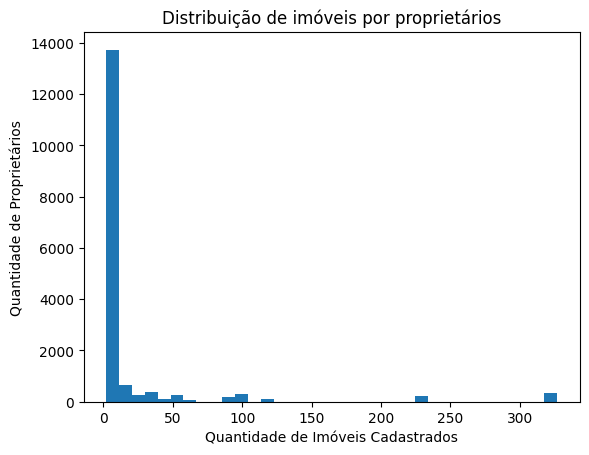

In [6]:
# columns = ["host_id","calculated_host_listings_count"]

rows = data.loc[:, "calculated_host_listings_count"] > 1

hosts_mult_property = data.loc[rows, "calculated_host_listings_count"]

plt.hist(hosts_mult_property, bins=35)
plt.title("Distribuição de imóveis por proprietários")
plt.xlabel("Quantidade de Imóveis Cadastrados")
plt.ylabel("Quantidade de Proprietários")

5. Draw a map with the cheapest properties by region.

-> select columns 'price', 'neighborhood_group', 'latitude' and 'longitude'

-> determine, by region, properties with minimum rental value

-> draw map with pins of these properties

In [7]:
columns = ["price", "neighbourhood_group", "latitude", "longitude"]

data_plot = data.loc[:, columns].groupby("neighbourhood_group").min().reset_index()

data_plot

,neighbourhood_group,price,latitude,longitude
0,Bronx,0,40.80011,-73.93190
1,Brooklyn,0,40.57115,-74.03942
2,Manhattan,0,40.70234,-74.01851
3,Queens,10,40.56546,-73.95927
4,Staten Island,13,40.49979,-74.24442


In [8]:
map = folium.Map()

for index, location_info in data_plot.iterrows():
    folium.Marker(
        [location_info["latitude"], location_info["longitude"]],
        popup=location_info[["neighbourhood_group", "price"]],
    ).add_to(map)

map

6. Draw a map with the properties that have the highest number of reviews by region.

-> select columns 'number_of_reviews' and 'neighborhood_group'

-> determine, by region, the properties with the maximum value of number of reviews

-> draw map with pins of these properties

In [9]:
columns = ["number_of_reviews", "neighbourhood_group", "latitude", "longitude"]

data_plot = data.loc[:, columns].groupby("neighbourhood_group").max().reset_index()

data_plot

,neighbourhood_group,number_of_reviews,latitude,longitude
0,Bronx,321,40.91306,-73.78158
1,Brooklyn,488,40.73890,-73.85676
2,Manhattan,607,40.87665,-73.90855
3,Queens,629,40.79721,-73.71299
4,Staten Island,333,40.64779,-74.06092


In [10]:
map = folium.Map()

for index, location_info in data_plot.iterrows():
    folium.Marker(
        [location_info["latitude"], location_info["longitude"]],
        popup=location_info[["neighbourhood_group", "number_of_reviews"]],
    ).add_to(map)

map

7. Draw a map with 100 randomly chosen 'private room' properties

-> select 'room_type', 'latitude' and 'longitude' columns

-> select only rows from 'room_type' = 'Private room'

-> draw map with loop to randomly plot 100 of the selected pins

In [11]:
columns = ["room_type", "latitude", "longitude"]
rows = data.loc[:, "room_type"] == "Private room"

data_plot = data.loc[rows, columns].sample(100)

data_plot

,room_type,latitude,longitude
20993,Private room,40.68490,-73.92890
46836,Private room,40.69774,-73.97502
43018,Private room,40.70426,-73.94542
38422,Private room,40.66191,-73.94137
26789,Private room,40.78642,-73.97652
...,...,...,...
19693,Private room,40.65131,-73.97866
13210,Private room,40.71901,-73.95940
22748,Private room,40.84745,-73.94116
45111,Private room,40.70517,-73.94288


In [12]:
map = folium.Map()

for index, location_info in data_plot.iterrows():
    folium.Marker(
        [location_info["latitude"], location_info["longitude"]],
        popup=location_info["room_type"],
    ).add_to(map)

map

8. Draw a map with 100 randomly chosen 'shared room' properties

-> select 'room_type', 'latitude' and 'longitude' columns

-> elect only rows from 'room_type' = 'Shared room'

-> draw map with loop to randomly plot 100 of the selected pins

In [13]:
columns = ["room_type", "latitude", "longitude"]
rows = data.loc[:, "room_type"] == "Shared room"

data_plot = data.loc[rows, columns].sample(100)

data_plot

,room_type,latitude,longitude
22068,Shared room,40.76389,-73.87155
44252,Shared room,40.80244,-73.96592
2001,Shared room,40.69132,-73.94205
32112,Shared room,40.81936,-73.95788
11468,Shared room,40.66838,-73.95624
...,...,...,...
4444,Shared room,40.65513,-74.00621
26866,Shared room,40.69166,-73.90928
41787,Shared room,40.69501,-73.91125
48116,Shared room,40.73143,-73.97549


In [14]:
map = folium.Map()

for index, location_info in data_plot.iterrows():
    folium.Marker(
        [location_info["latitude"], location_info["longitude"]],
        popup=location_info["room_type"],
    ).add_to(map)

map